##**Задача 1**

*Пункт а)*

Функция правдоподобия очевидным олбразом принимает указанный ниже вид. Просто считаем вероятность того, что повторяющаяся машина попадется на 10-й поездке.

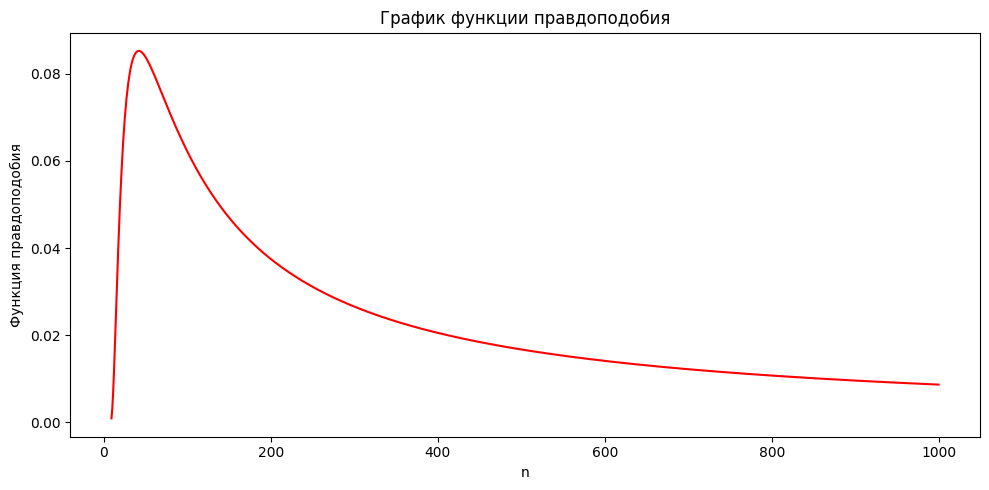

In [71]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

def f(n, j):
  l = 1
  for i in range(2, j):
    l *= (n-i+1)/n
  return l*((j-1)/n)

l_values = []
x = np.arange(9, 1001)
for k in range(9, 1001):
  l_values.append(f(k, 10))


plt.plot(x, l_values, color='red')
plt.xlabel('n')
plt.ylabel('Функция правдоподобия')
plt.title('График функции правдоподобия');

plt.show()

In [72]:
import scipy
from scipy import optimize

def f(x): # ищем максимум функции
    a = 1
    for i in range(9):
        a *= (x-i)
    a = a/x**10
    return -a

result = optimize.minimize_scalar(f, bounds = (10, 100), method = 'bounded')
result.x

41.77139670602732

In [73]:
-f(41) < -f(42) #выходит true, значит, для целых иксов максимум в точке 42

True

Ответ на пункт а: *n = 42*

*Пункт б)*

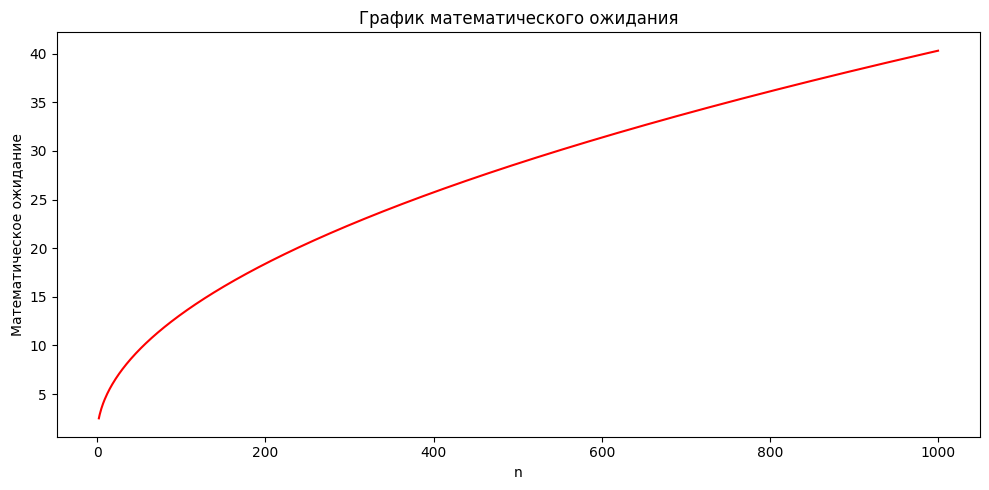

In [74]:
def prob(k, n): #функция вероятности
  a = 1
  for i in range(2,k+1):
    a = a*(n-i+2)/n
  return a*(k-1)/n

def exp_mean(n): #функция математического ожидания
  c = 0
  for k in range(2, n+2):
    c += k*prob(k, n)
  return(c)

E = []
n_values = np.arange(2, 1001)
for n in n_values:
  E.append(exp_mean(n))

plt.plot(n_values, E, color='red')
plt.xlabel('n')
plt.ylabel('Математическое ожидание')
plt.title('График математического ожидания');

In [75]:
# посчитаем оценку методом моментов
def mm(a, real):
 return min(a, key=lambda x: abs(x-real))

mm = mm(E, 10)
index = E.index(mm)
n_mm = n_values[index]
print(n_mm)

55


Ответ на пункт б: *n = 55*

*Пункт в)*

In [76]:
# сначала посмотрим, в какие дни приезжал повторяющийся таксист
days = []
for i in range(10000):
  l = []
  day = 1
  t = np.random.choice(range(1,101))
  while t not in l:
    l.append(t)
    day +=1
    t = np.random.choice(range(1,101))
  days.append(day)

In [77]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

def f(n, j):
  l = 1
  for i in range(2, j):
    l *= (n-i+1)/n
  return l*((j-1)/n)

l_values = []
x = np.arange(9, 1001)
for k in range(9, 1001):
  l_values.append(f(k, 10))

Смещение:  -4.337299999999999
Дисперсия:  8315.44072871
Cреднеквадратичная ошибка:  8334.2529


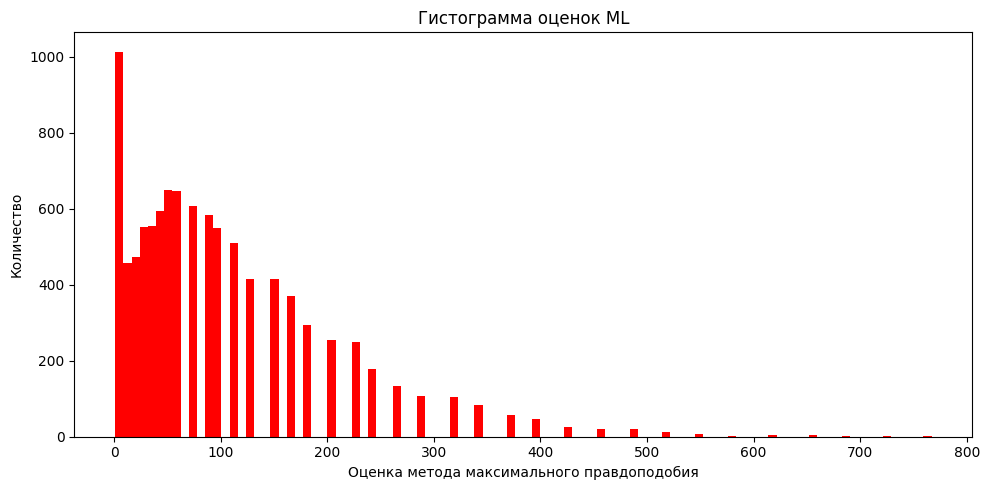

In [78]:
# оценки метода максимального правдоподобия
ml_ocenki = []
for i in days:
  n = np.arange(i - 1, 1000)
  L = np.array([f(k, i) for k in n])
  ml = n[L.argmax()]
  ml_ocenki.append(ml)

plt.hist(ml_ocenki, bins = 100, color='red');
plt.xlabel('Оценка метода максимального правдоподобия')
plt.ylabel('Количество')
plt.title('Гистограмма оценок ML');
print('Смещение: ', np.mean(ml_ocenki) - 100)
print('Дисперсия: ', np.var(ml_ocenki))
print('Cреднеквадратичная ошибка: ', np.mean((np.array(ml_ocenki) - 100)**2))

Смещение:  23.804599999999994
Дисперсия:  13776.84601884
Cреднеквадратичная ошибка:  14343.505


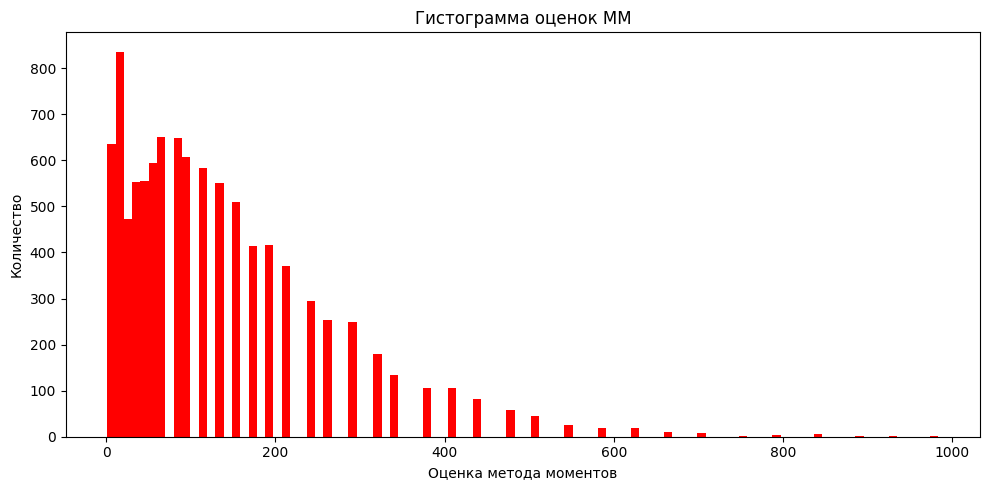

In [79]:
# оценки метода моментов
mm_ocenki = []
for j in days:
  mm = E.index(min(E, key=lambda x: abs(x-j))) + 1
  mm_ocenki.append(mm)

plt.hist(mm_ocenki, bins = 100, color='red');
plt.xlabel('Оценка метода моментов')
plt.ylabel('Количество')
plt.title('Гистограмма оценок ММ');
print('Смещение: ', np.mean(mm_ocenki) - 100)
print('Дисперсия: ', np.var(mm_ocenki))
print('Cреднеквадратичная ошибка: ', np.mean((np.array(mm_ocenki) - 100)**2))

##**Задача 2**

*Пункт а)*

In [80]:
import numpy as np
import itertools
# функция правдоподобия

def like(k, n, l=10):
    i_values = np.arange(1, k)
    probabilities = np.prod((n - i_values) / n)

    combs = np.array(list(itertools.combinations_with_replacement(np.arange(1, k + 1), l - k)))
    combination_products = np.prod(combs, axis=1)
    sum_combinations = np.sum(combination_products)

    probability = probabilities * sum_combinations / (n ** (l - k))

    return probability

Text(0.5, 1.0, 'График функции правдоподбия')

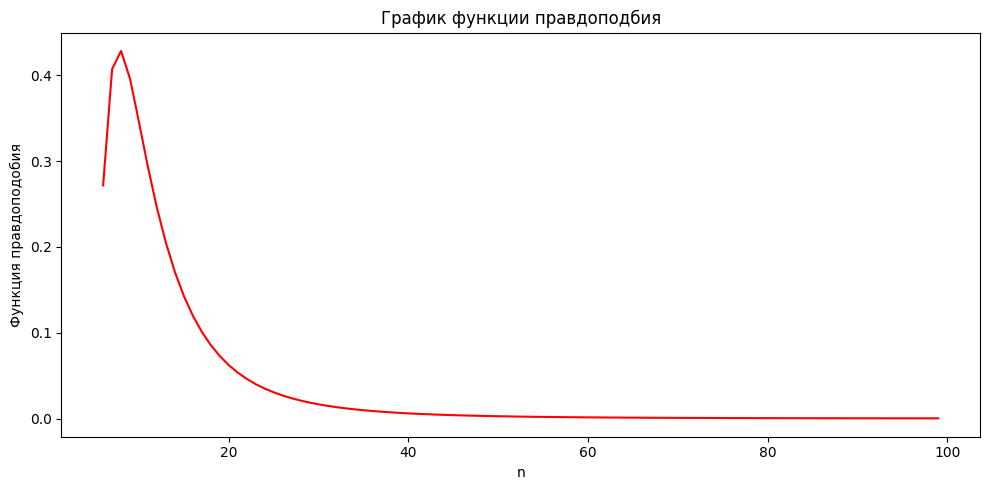

In [81]:
n_values = np.arange(6,100)
like_values = [like(6, n) for n in range(6, 100)]

plt.plot(n_values, like_values, color = 'red')
plt.xlabel('n')
plt.ylabel('Функция правдоподобия')
plt.title('График функции правдоподбия')

In [82]:
n_values[like_values == np.max(like_values)][0] # оценка метода максимального правдоподобия

8

Ответ на пункт а: *n = 8*

*Пункт б)*

In [83]:
def E(n): # функция математического ожидания
    c = 0
    for i in range(1, 11):
        c += i*like(i, n, l = 10)
    return c

8


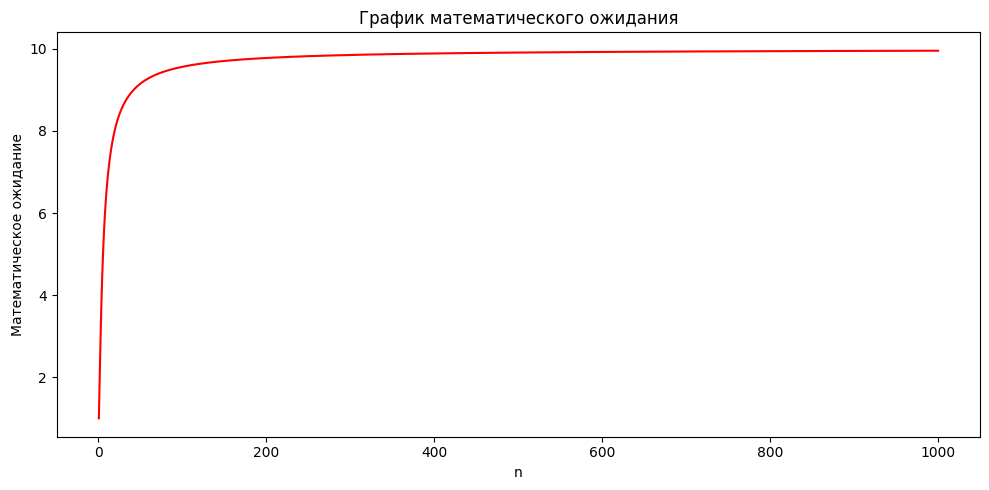

In [84]:
n_values = np.arange(1, 1001)
E = np.array([E(i) for i in range(1, 1001)])

plt.plot(n_values, E, color='red') # график математического ожидания
plt.xlabel('n')
plt.ylabel('Математическое ожидание')
plt.title('График математического ожидания')


ind = np.argmin(np.abs(E - 6))
n_mm = n_values[ind]
print(n_mm) # оценка метода моментов

Ответ на пункт б: *n = 8*

*Пункт в)*

In [85]:
def f(n, m):
    names = np.arange(1, n+1)
    lst = np.random.choice(names, size=m)
    return np.unique(lst).shape[0]

names1 = np.array([f(20, 10) for _ in range(10000)])

names_ml = np.zeros(len(names1))

for i, k in enumerate(names1):
    n = np.arange(k, 100)
    est = np.array([like(k, n) for n in range(k, 100)])
    max = np.max(est)
    names_ml[i] = np.where(n[est == max] < 100,
                    n[est == max],
                    100)

names_ml = np.array(names_ml)

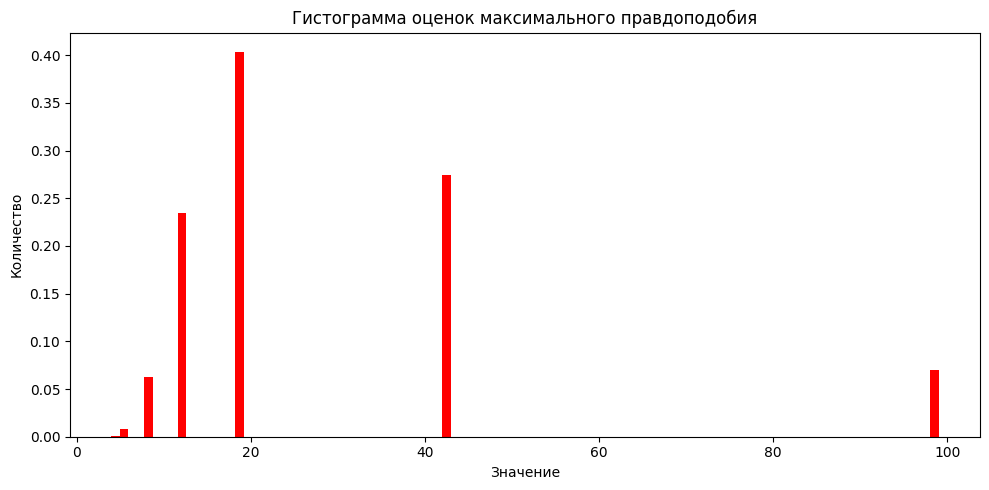

In [86]:
plt.hist(names_ml, density = True, bins = 100, color='red')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.title('Гистограмма оценок максимального правдоподобия')
plt.show()

In [87]:
names_mm = []
for j in names1:
    names2 = n_values[abs(E - j) == np.min(abs(E - j))][0]
    if names2 < 100:
        names_mm.append(names2)
    else:
        names_mm.append(100)

names_mm = np.array(names_mm)

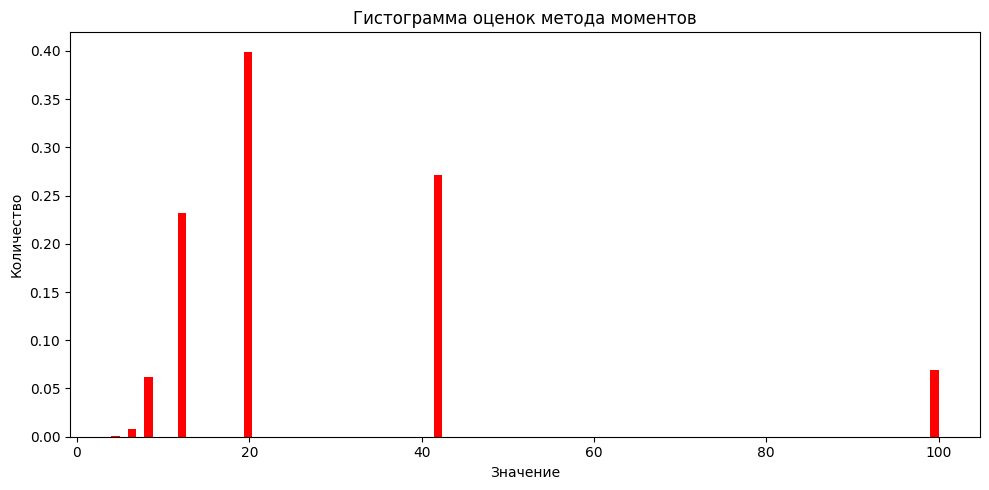

In [88]:
plt.hist(names_mm, density = True, bins = 100, color='red')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.title('Гистограмма оценок метода моментов')
plt.show()

##**Задача 3**

*Пункт а)*

In [89]:
import scipy.stats as sts
values = np.random.exponential(1, size=(10000, 20)) # наши данные

In [90]:
np.random.seed(1)
k = 0
for i in range(0, 10000): #для нормального интервала
  mean = np.mean(values[i])
  std = np.std(values[i], ddof=1)
  interval = sts.norm.interval(alpha=0.95, loc=mean, scale=std/np.sqrt(20))
  if interval[0] <= 1 <= interval[1]:
    k += 1
print(k/10000)

<ipython-input-90-8494724149c0>:6: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  interval = sts.norm.interval(alpha=0.95, loc=mean, scale=std/np.sqrt(20))


0.9071


In [91]:
np.random.seed(1)
k = 0
for i in values: #для наивного бутстрэпа
    sample = np.random.choice(i, size = (10000, 20))
    sample_mean = sample.mean(axis = 1)
    left = np.quantile(sample_mean, 0.05/2)
    right = np.quantile(sample_mean, 1-0.05/2)

    if left <= 1 <= right:
      k += 1

prob = k/10000
print(prob)

0.9062


In [92]:
np.random.seed(1)
k = 0

for i in values: # для бутстрэпа т-статистики
    sample = np.random.choice(i, size = (10000, 20))
    samples = (np.mean(sample, axis = 1) - np.mean(i))/np.std(sample, axis = 1, ddof = 1)
    left = np.quantile(samples, 0.05/2)
    right = np.quantile(samples, 1 - 0.05/2)
    one = np.mean(i) - right*np.std(i)
    two = np.mean(i) - left*np.std(i)

    if one <= 1 <= two:
        k += 1

prob = k/10000
print(prob)

0.944


*Пункт б)*

In [93]:
t_values = sts.t.rvs(3, size = (10000, 20), random_state = 100) #данные

In [94]:
np.random.seed(1) #нормальный CI
k = 0
for i in t_values:
  interval = sts.norm.interval(alpha=0.95, loc=np.mean(i), scale=np.std(i, ddof=1)/np.sqrt(20))
  if interval[0] <= 0 <= interval[1]:
    k += 1
print(k/10000)

<ipython-input-94-a992e8b74774>:4: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  interval = sts.norm.interval(alpha=0.95, loc=np.mean(i), scale=np.std(i, ddof=1)/np.sqrt(20))


0.9448


In [95]:
np.random.seed(1) #наивный бутстрэп
k = 0
for i in t_values:
    sample = np.random.choice(i, size = (10000, 20))
    sample_mean = sample.mean(axis = 1)
    left = np.quantile(sample_mean, 0.05/2)
    right = np.quantile(sample_mean, 1-0.05/2)

    if left <= 0 <= right:
      k += 1

print(k/10000)

0.9228


In [96]:
np.random.seed(1) #бутстрэп т-статистики
k = 0
for i in t_values:
    sample = np.random.choice(i, size = (10000, 20))
    samples = (np.mean(sample, axis = 1) - np.mean(i))/np.std(sample, axis = 1, ddof = 1)
    left = np.quantile(samples, 0.05/2)
    right = np.quantile(samples, 1 - 0.05/2)
    one = np.mean(i) - right*np.std(i)
    two = np.mean(i) - left*np.std(i)

    if one <= 0 <= two:
        k += 1

prob = k/10000
print(prob)

0.9216


##**Задача 4**

*Пункт а)*

In [97]:
import pandas as pd
import scipy

df = pd.read_excel('/content/22-23_hse_probability.xlsx', sheet_name = 'Exam')
df = df[5:]
df = df.reset_index(drop = True)

In [98]:
glasn = df[df['Last name'].str.startswith(tuple([*'АЕЁИОУЫЭЮЯ']))]
sogl = df[~df['Last name'].str.startswith(tuple([*'АЕЁИОУЫЭЮЯ']))]

In [99]:
from scipy import stats #тест Уэлча

x = np.array(sogl['оценка']) #согласные
y = np.array(glasn['оценка']) #гласные

t_statistic, p_welch = stats.ttest_ind(x, y, equal_var = False, alternative = 'two-sided')

print(p_welch)

0.3974027153843839


Ответ на пункт а: нулевая гипотеза не отвергается, так как p-value больше уровня значимости

*Пункт б)*

In [100]:
n_x = len(x) #283
x_choice = np.random.choice(np.arange(n_x), size=(10000, n_x))
n_y = len(y) #49
y_choice = np.random.choice(np.arange(n_y), size=(10000, n_y))

In [101]:
mean_diff = np.mean(x) - np.mean(y)
bootstrap_diff = np.mean(x[x_choice], axis=1) - np.mean(y[y_choice], axis=1)

In [102]:
q_025 = np.percentile(bootstrap_diff, 2.5)
q_975 = np.percentile(bootstrap_diff, 97.5)

p_1 = np.mean(mean_diff < bootstrap_diff)
p_2 =np.mean(mean_diff >= bootstrap_diff)
p_val_naive = 2*min(p_1, p_2)

print(q_025 <= mean_diff, mean_diff <= q_975)
print(p_val_naive)

True True
0.9858


Ответ на пункт б: нулевая гипотеза не отвергается, так как уровень значимости меньше p-value

*Пункт в)*

In [103]:
bootstrap_var = np.var(x[x_choice], axis = 1)/n_x + np.var(y[y_choice], axis = 1)/n_y
bootstrap_std = np.sqrt(bootstrap_var)

bootstrap_samples = (mean_diff - bootstrap_diff)/bootstrap_std

boot_q_025 = np.percentile(bootstrap_samples, 2.5)
boot_q_975 = np.percentile(bootstrap_samples, 97.5)

In [104]:
t_statistic, p_welch = stats.ttest_ind(x, y, equal_var = False, alternative = 'two-sided') #всё же повторимся
p_1 = np.mean(t_statistic < bootstrap_samples)
p_2 = np.mean(t_statistic >= bootstrap_samples)
p_val_not_naive = 2* min(p_1, p_2)

print(boot_q_025 <= t_statistic, boot_q_975 >= t_statistic)
print(p_val_not_naive)

True True
0.4166


Ответ на пункт в: нулевая гипотеза не отвергается по той же причине

*Пункт г)*

In [105]:
Z = np.concatenate((x, y))
diffs = np.zeros(1000) #сюда будем складывать разности

for i in range(1000):
  np.random.shuffle(Z)

  Z1 = Z[:n_x]
  Z2 = Z[n_x:]

  diff = np.mean(Z1) - np.mean(Z2)

  diffs[i] = diff

p_value = np.sum(np.abs(diffs) >= np.abs(mean_diff)) /1000

p_value

0.382

Ответ на пункт г: нулевая гипотеза также не отвергается

##**Задача 5**

*Пункт а)*

In [106]:
median = np.median(df['оценка']) #составим таблицу сопряженности, разбив всех на 4 группы

A = x[x> median] #согласные больше медианы
B = x[x< median] #согласные меньше медианы

C = y[y > median] #гласные больше медианы
D = y[y < median] #гласные меньше медианы

table = pd.DataFrame({'Согласные' : [len(A), len(B)], 'Гласные' : [len(C), len(D)]},
                     index = ['Больше медианы', 'Меньше медианы'])
table

,Согласные,Гласные
Больше медианы,145,21
Меньше медианы,138,28


Вычисляем odds ratio для двух групп. Это будет просто $r = \dfrac{bc}{ad}$ (если считаем гласных к согласным), затем считаем стандартную ошибку логарифма полученного отношения как $s = \sqrt{\dfrac{1}{a} + \dfrac{1}{b} + \dfrac{1}{c} + \dfrac{1}{d}}$. Тогда 95-% асимптотический доверительный интервал будет выглядеть как $CI_{0.95} = (e^{ln(r) - 1.96}, e^{ln(r) + 1.96})$.

In [107]:
a = len(A)
b = len(B)
c = len(C)
d = len(D)

odds_ratio = (b * c)/(a * d)

se = np.sqrt(1/a + 1/b + 1/c + 1/d)

lower_bound = np.exp(np.log(odds_ratio) - 1.96 * se)
upper_bound = np.exp(np.log(odds_ratio) + 1.96 * se)

print(lower_bound, upper_bound) #это наш доверительный интервал

0.3870902431823096 1.3162320763800788


In [108]:
z_score = np.log(odds_ratio) / se
p_value = 2 * min(stats.norm.cdf(z_score), 1 - stats.norm.cdf(z_score))
p_value

0.280180274566451

Ответ на пункт а: нулевая гипотеза не отвергается, так как p-value больше уровня значимости

*Пункт б)*

In [109]:
prob_ln_diff = np.log(b/b + d) - np.log(a/a + c)

se = np.sqrt(1/a - 1/(a + c) + 1/b - 1/(b + d))

prob_se = prob_ln_diff/(se)

lower_bound = np.exp(prob_ln_diff - 1.96*se)
upper_bound = np.exp(prob_ln_diff + 1.96*se)

p_value = 2 * min(stats.norm.cdf(prob_se), 1-stats.norm.cdf(prob_se))

In [110]:
print(lower_bound, upper_bound)
print(p_value)

1.2050819117398301 1.4418964294937169
1.580664044098512e-09


Ответ на пункт б: нулевая гипотеза отвергается


*Пункт в)*

In [111]:
odds_ratios = np.zeros(10000) #10000 раз выбираем людей из согласных и несогласных и строим для них матрицу сопряженности
p_sogl = a/(a + b)
p_glas = c/(c + d)

odds_ratio = (p_sogl * (1 - p_glas))/(p_glas * (1 - p_sogl))

In [112]:
for i in range(10000):
  x_i = np.random.choice(df['оценка'], size = 283) #новые согласные
  y_i = np.random.choice(df['оценка'], size = 49) #новые гласные

  a_i = len(x_i[x_i > median]) #новые согласные > медианы
  b_i = len(x_i[x_i < median]) #новые согласные < медианы
  c_i = len(y_i[y_i > median]) #новые гласные > медианы
  d_i = len(y_i[y_i < median]) #новые гласные < медианы

  p_sogl_i = a_i/(a_i + b_i)
  p_glas_i = c_i/(c_i + d_i)

  odds_ratio_i = (p_sogl_i * (1 - p_glas_i))/(p_glas_i * (1 - p_sogl_i))
  odds_ratios[i] = odds_ratio_i

q_025 = np.percentile(odds_ratios, 2.5)
q_975 = np.percentile(odds_ratios, 97.5)

p_1 = np.mean((odds_ratio <= odds_ratios))
p_2 = np.mean((odds_ratio >= odds_ratios))

p_value = 2 * min(p_1, p_2)

In [113]:
print(odds_ratio <= q_975, odds_ratio >= q_025)
print(p_value)

True True
0.2812


Ответ на пункт в: нулевая гипотеза не отвергается

##**Задача 6**

*Пункт а)*

Воспользуемся повторным свойством матожидания:
$$ E(Y_i|F_i) = \beta \cdot F_i \Rightarrow E(Y_i) = E(E(Y_i|F_i)) = E(\beta F_i) = \beta E(F_i) ⇒ \beta = \dfrac{E(Y_i)}{E(F_i)}$$
Отсюда получаем оценку методом моментов на $\beta$, заменив настоящие матожидания на их выборочные аналоги:
$$\hat{\beta}_{MM} = \dfrac{\bar{Y}}{\bar{F}}$$

Осталось лишь вычислить $\bar{Y}$ и $\bar{F}$.

In [114]:
np.mean(df['оценка'])

16.204819277108435

In [115]:
y_bar = np.mean(df['оценка'])
df['num_letters'] = df['Last name'].apply(lambda x: len(x))
f_bar = np.mean(df['num_letters'])

beta_hat = y_bar / f_bar

print(beta_hat)

2.0613026819923372


Ответ на пункт а: ~2.06

*Пункт б)*

Вычислим наблюдаемое значение корреляции и проведём перестановочный тест.

In [116]:
observed_corr = df['num_letters'].corr(df['оценка'])

permutation_corrs = np.zeros(10000)

for i in range(10000):
  permuted_num_letters = np.random.permutation(df['num_letters'])
  permuted_corr = pd.Series(permuted_num_letters).corr(df['оценка'])
  permutation_corrs[i] = permuted_corr

p_value = np.mean(np.abs(permutation_corrs) >= np.abs(observed_corr))

print(p_value)

0.641


Ответ на пункт б: нулевая гипотеза не отвергается


##**Задача 7**

Я просто замучила Chat GPT, но в итоге мы смогли решить задачу из первого минимума!

Скриншоты диалога в отдельном pdf-файле

##**Задача 8**

https://www.youtube.com/watch?v=eow125xV5-c - вот это видео помогло мне понять, что такое бутстрэп. Впервые нам объясняли этот метод на анализе данных, а после - на семинарах по мат стату. Оба раза было сложно быстро осознать и понять, как это работает на практике. Видео помогло разобраться с основами, и теперь я всем своим друзьям рассказываю, что такое бутстрэп :)